In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train_data=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_data=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
train_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
train_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [8]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


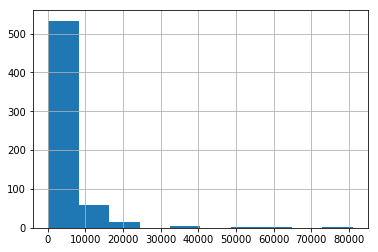

In [10]:
train_data['ApplicantIncome'].hist(bins=10)
plt.show()

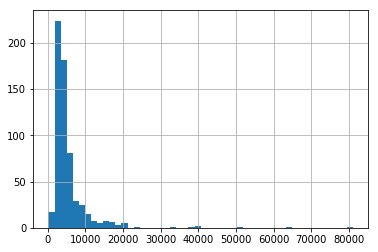

In [11]:
train_data['ApplicantIncome'].hist(bins=50)
plt.show()

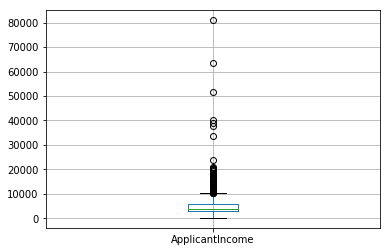

In [13]:
train_data.boxplot(column='ApplicantIncome')
plt.show()

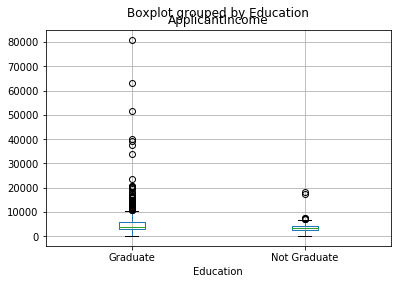

In [14]:
train_data.boxplot(column='ApplicantIncome',by='Education')
plt.show()

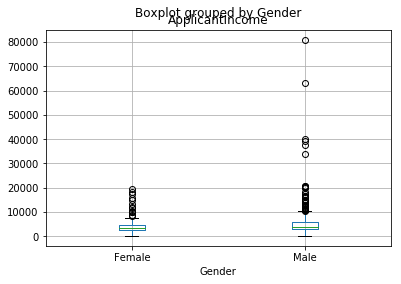

In [15]:
train_data.boxplot(column='ApplicantIncome',by='Gender')
plt.show()

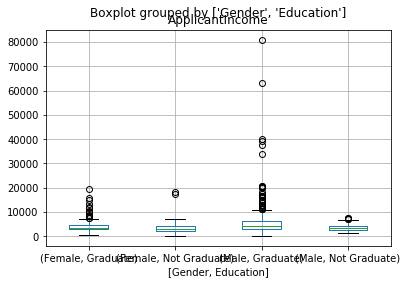

In [16]:
train_data.boxplot(column='ApplicantIncome',by=['Gender','Education'])
plt.show()

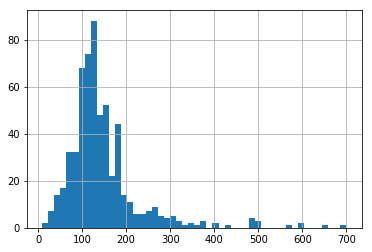

In [17]:
train_data['LoanAmount'].hist(bins=50)
plt.show()

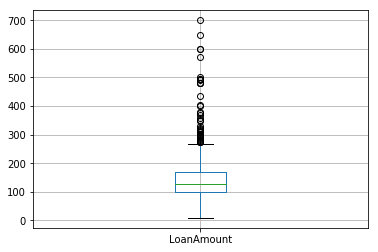

In [18]:
train_data.boxplot('LoanAmount')
plt.show()

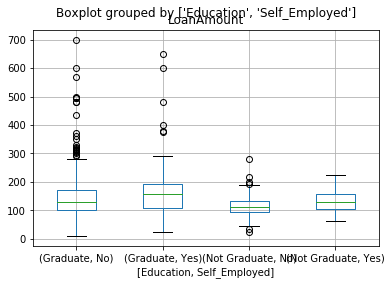

In [19]:
train_data.boxplot('LoanAmount',by=['Education','Self_Employed'])
plt.show()

In [20]:
train_data.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [22]:
train_data['ApplicantIncome'].fillna(train_data['ApplicantIncome'].mean(),inplace=True)

In [23]:
train_data['CoapplicantIncome'].fillna(train_data['CoapplicantIncome'].mean(),inplace=True)

In [24]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)

In [26]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mean(),inplace=True)

In [27]:
train_data.dropna(inplace=True)

In [28]:
train_data.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
train_data.shape

(554, 13)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

In [47]:
def classifier_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    prediction=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(prediction,data[outcome])
    print("Accuracy :%s" % "{0:.3%}".format(accuracy))

In [41]:
outcome_var='Loan_Status'

In [42]:
model=LogisticRegression()


In [43]:
predictor_var=['Credit_History']

In [48]:
classifier_model(model,train_data,predictor_var,outcome_var)

Accuracy :80.866%
